In [ ]:
import pandas as pd

## Warm up!

In [ ]:
warm_up_df = pd.read_csv('warm_up.csv', index_col=0)
warm_up_df

,name,score,attempts,qualify
a,Anastasia,12.5,1,yes
b,Dima,9.0,3,no
c,Katherine,16.5,2,yes
d,James,NaN,3,no
e,Emily,9.0,2,no
f,Michael,20.0,3,yes
g,Matthew,14.5,1,yes
h,Laura,NaN,1,no
i,Kevin,8.0,2,no
j,Jonas,19.0,1,yes


#### Shape of dataset

In [ ]:
print(f'rows: {warm_up_df.shape[0]}, columns: {warm_up_df.shape[1]}')

rows: 10, columns: 4


#### Selecting rows

In [ ]:
print(f'first 3 rows:\n{warm_up_df.head(3)}\n')
print(f'last 4 rows:\n{warm_up_df.tail(4)}\n')
print(f'every 2nd row:\n{warm_up_df.iloc[::2, :]}\n')
print(f'2nd and 3rd column:\n{warm_up_df.iloc[:, 1:3]}\n')

first 3 rows:
        name  score  attempts qualify
a  Anastasia   12.5         1     yes
b       Dima    9.0         3      no
c  Katherine   16.5         2     yes

last 4 rows:
      name  score  attempts qualify
g  Matthew   14.5         1     yes
h    Laura    NaN         1      no
i    Kevin    8.0         2      no
j    Jonas   19.0         1     yes

every 2nd row:
        name  score  attempts qualify
a  Anastasia   12.5         1     yes
c  Katherine   16.5         2     yes
e      Emily    9.0         2      no
g    Matthew   14.5         1     yes
i      Kevin    8.0         2      no

2nd and 3rd column:
   score  attempts
a   12.5         1
b    9.0         3
c   16.5         2
d    NaN         3
e    9.0         2
f   20.0         3
g   14.5         1
h    NaN         1
i    8.0         2
j   19.0         1



#### iloc d-e-f: score & attempts

In [ ]:
print('score and attempts for rows [d, e, f]')
warm_up_df.iloc[3:6, 1:3]

score and attempts for rows [d, e, f]


,score,attempts
d,NaN,3
e,9.0,2
f,20.0,3


#### Students who tried max attempts

In [ ]:
max_attempts = warm_up_df.attempts.max()
print(f'max attempts {max_attempts}')
warm_up_df.loc[warm_up_df.attempts == max_attempts]

max attempts 3


,name,score,attempts,qualify
b,Dima,9.0,3,no
d,James,NaN,3,no
f,Michael,20.0,3,yes


#### Mean and median for score

In [ ]:
print(f'mean score {warm_up_df.score.mean()}')
print(f'median score {warm_up_df.score.median()}')

mean score 13.5625
median score 13.5


#### Setting name as index

In [ ]:
# set_index name
warm_up_df.set_index('name', inplace=True)
warm_up_df

,score,attempts,qualify
name,,,
Anastasia,12.5,1,yes
Dima,9.0,3,no
Katherine,16.5,2,yes
James,NaN,3,no
Emily,9.0,2,no
Michael,20.0,3,yes
Matthew,14.5,1,yes
Laura,NaN,1,no
Kevin,8.0,2,no


In [ ]:
warm_up_df.rename(columns={'score': 'points'}, inplace=True)
warm_up_df

,points,attempts,qualify
name,,,
Anastasia,12.5,1,yes
Dima,9.0,3,no
Katherine,16.5,2,yes
James,NaN,3,no
Emily,9.0,2,no
Michael,20.0,3,yes
Matthew,14.5,1,yes
Laura,NaN,1,no
Kevin,8.0,2,no


In [ ]:
warm_up_df.to_csv('warm_up_done.csv', ',', index=False)

## Missing values

#### Load dataframe with missing values

In [ ]:
import pandas as pd
missing_df = pd.read_excel('missing.xlsx')
missing_df

,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
0,70001.0,NaN,10.50,2012-10-05,3002,5002.0
1,NaN,NaN,20.65,2012-09-10,3001,5003.0
2,70002.0,65.26,NaN,NaN,3001,5001.0
3,70004.0,110.50,11.50,2012-08-17,3003,NaN
4,NaN,948.50,98.50,2012-09-10,3002,5002.0
5,70005.0,NaN,NaN,2012-07-27,3001,5001.0
6,NaN,5760.00,57.00,2012-09-10,3001,5001.0
7,70010.0,1983.43,19.43,2012-10-10,3004,NaN
8,70003.0,NaN,NaN,2012-10-10,3003,5003.0
9,70012.0,250.45,25.45,2012-06-27,3002,5002.0


#### Summarizing missing info



In [ ]:
missing_values_by_column = missing_df.isna().sum()
print(f'The total number of missing columns: {missing_values_by_column.sum()}')
print(f'They are split across the columns the following way:\n')
missing_values_by_column

The total number of missing columns: 15
They are split across the columns the following way:



ord_no         4
purch_amt      4
sale_amt       3
ord_date       1
customer_id    0
salesman_id    3
dtype: int64

Which is quite a lot considering rather modest original shape.
Let's try to remove all missing values.

In [ ]:
def calculate_data_loss(df):
  no_nan_size = df.dropna().shape[0]
  original_df_size = df.shape[0]
  percentage_removed = (original_df_size - no_nan_size) / original_df_size * 100
  print(f'{round(percentage_removed, 2)}% was removed!')

In [ ]:
calculate_data_loss(missing_df)

91.67% was removed!


It is way too much! let's do it the other way.




#### First some type casting

In [ ]:
missing_df.ord_no = missing_df.ord_no.astype('Int64')
missing_df.salesman_id = missing_df.salesman_id.astype('Int64')
missing_df.ord_date = pd.to_datetime(missing_df.ord_date, format='%Y-%m-%d')

missing_df

,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
0,70001,NaN,10.50,2012-10-05,3002,5002
1,<NA>,NaN,20.65,2012-09-10,3001,5003
2,70002,65.26,NaN,NaT,3001,5001
3,70004,110.50,11.50,2012-08-17,3003,<NA>
4,<NA>,948.50,98.50,2012-09-10,3002,5002
5,70005,NaN,NaN,2012-07-27,3001,5001
6,<NA>,5760.00,57.00,2012-09-10,3001,5001
7,70010,1983.43,19.43,2012-10-10,3004,<NA>
8,70003,NaN,NaN,2012-10-10,3003,5003
9,70012,250.45,25.45,2012-06-27,3002,5002


#### Filling missing order numbers

Let's first sort it by date and order_no to see if there is a correlation


In [ ]:
missing_df.sort_values(['ord_date', 'ord_no'])

,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
11,70013,3045.60,35.60,2012-04-25,3001,<NA>
9,70012,250.45,25.45,2012-06-27,3002,5002
5,70005,NaN,NaN,2012-07-27,3001,5001
3,70004,110.50,11.50,2012-08-17,3003,<NA>
10,<NA>,75.29,75.29,2012-08-17,3001,5003
1,<NA>,NaN,20.65,2012-09-10,3001,5003
4,<NA>,948.50,98.50,2012-09-10,3002,5002
6,<NA>,5760.00,57.00,2012-09-10,3001,5001
0,70001,NaN,10.50,2012-10-05,3002,5002
8,70003,NaN,NaN,2012-10-10,3003,5003


Even if there is a correlation, we could not interpret it. So we fill it with quite random stuff

In [ ]:
max_no = missing_df.ord_no.max()

def get_no(row):
  if row.ord_no == 0:
     return max_no + int(row.name)
  return row.ord_no

missing_df.ord_no = missing_df.ord_no.fillna(0)
missing_df.ord_no = missing_df.apply(get_no, axis=1)
missing_df

,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
0,70001,NaN,10.50,2012-10-05,3002,5002
1,70014,NaN,20.65,2012-09-10,3001,5003
2,70002,65.26,NaN,NaT,3001,5001
3,70004,110.50,11.50,2012-08-17,3003,<NA>
4,70017,948.50,98.50,2012-09-10,3002,5002
5,70005,NaN,NaN,2012-07-27,3001,5001
6,70019,5760.00,57.00,2012-09-10,3001,5001
7,70010,1983.43,19.43,2012-10-10,3004,<NA>
8,70003,NaN,NaN,2012-10-10,3003,5003
9,70012,250.45,25.45,2012-06-27,3002,5002


#### Filling ord_date
only one ord_date is missing, so let's just ffill

In [ ]:
missing_df.sort_values(by='ord_date', inplace=True)
missing_df['ord_date'].interpolate(method='ffill', inplace=True)

missing_df

,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
11,70013,3045.60,35.60,2012-04-25,3001,<NA>
9,70012,250.45,25.45,2012-06-27,3002,5002
5,70005,NaN,NaN,2012-07-27,3001,5001
3,70004,110.50,11.50,2012-08-17,3003,<NA>
10,70023,75.29,75.29,2012-08-17,3001,5003
1,70014,NaN,20.65,2012-09-10,3001,5003
4,70017,948.50,98.50,2012-09-10,3002,5002
6,70019,5760.00,57.00,2012-09-10,3001,5001
0,70001,NaN,10.50,2012-10-05,3002,5002
7,70010,1983.43,19.43,2012-10-10,3004,<NA>


#### Filling sale amount
just replace NaNs with 0

In [ ]:
missing_df['sale_amt'] = missing_df.sale_amt.fillna(0)
missing_df

,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
11,70013,3045.60,35.60,2012-04-25,3001,<NA>
9,70012,250.45,25.45,2012-06-27,3002,5002
5,70005,NaN,0.00,2012-07-27,3001,5001
3,70004,110.50,11.50,2012-08-17,3003,<NA>
10,70023,75.29,75.29,2012-08-17,3001,5003
1,70014,NaN,20.65,2012-09-10,3001,5003
4,70017,948.50,98.50,2012-09-10,3002,5002
6,70019,5760.00,57.00,2012-09-10,3001,5001
0,70001,NaN,10.50,2012-10-05,3002,5002
7,70010,1983.43,19.43,2012-10-10,3004,<NA>


#### Filling salesman id
all unknown go to mistical id 0

In [ ]:
missing_df['salesman_id'] = missing_df.salesman_id.fillna(0).astype('Int64')
missing_df

,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
11,70013,3045.60,35.60,2012-04-25,3001,0
9,70012,250.45,25.45,2012-06-27,3002,5002
5,70005,NaN,0.00,2012-07-27,3001,5001
3,70004,110.50,11.50,2012-08-17,3003,0
10,70023,75.29,75.29,2012-08-17,3001,5003
1,70014,NaN,20.65,2012-09-10,3001,5003
4,70017,948.50,98.50,2012-09-10,3002,5002
6,70019,5760.00,57.00,2012-09-10,3001,5001
0,70001,NaN,10.50,2012-10-05,3002,5002
7,70010,1983.43,19.43,2012-10-10,3004,0


#### Filling purchase amount
Nothing to do with purchase amount. Any extrapolation would be bad for general statistic. They might be kept, but flagged as bad for purchase calculations - and all working with this computations must rely on the flag, or! Deleted. Which is better for the final solution.

First let's calculate dataloss

In [ ]:
calculate_data_loss(missing_df)

33.33% was removed!


In [ ]:
missing_df.dropna(subset=['purch_amt'], inplace=True)
missing_df

,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
11,70013,3045.60,35.60,2012-04-25,3001,0
9,70012,250.45,25.45,2012-06-27,3002,5002
3,70004,110.50,11.50,2012-08-17,3003,0
10,70023,75.29,75.29,2012-08-17,3001,5003
4,70017,948.50,98.50,2012-09-10,3002,5002
6,70019,5760.00,57.00,2012-09-10,3001,5001
7,70010,1983.43,19.43,2012-10-10,3004,0
2,70002,65.26,0.00,2012-10-10,3001,5001


In [ ]:
# format data
missing_df.ord_date = missing_df.ord_date.apply(lambda x: x.strftime('%Y-%m-%d')).sort_index()
missing_df.to_excel('not_missing.xlsx', index=False)

## Pizza

Import pandas and load the pizza file

In [ ]:
import pandas as pd
pizza_df = pd.read_csv('pizza.csv', delimiter=';')
pizza_df

,pizzaiolo,topping,2nd topping,napoli style crust,extra mozzarella,extra chili oil,diameter,price
0,Alberto,prosciutto,cubetti di speck,yes,yes,no,40.7,24.1
1,Alberto,taleggio,cubetti di speck,yes,yes,no,37.0,21.3
2,Alberto,mushrooms,cubetti di speck,yes,yes,yes,29.6,15.3
3,Alberto,bresaola,cubetti di speck,yes,no,yes,25.9,18.0
4,Alberto,burrata,cubetti di speck,yes,no,yes,33.3,25.1
...,...,...,...,...,...,...,...,...
126,Enrico,tonno,onion,yes,yes,yes,22.2,11.7
127,Enrico,tonno,onion,yes,yes,yes,25.9,13.8
128,Enrico,salami milanese,peperoncini,yes,no,yes,15.7,9.6
129,Enrico,salami milanese,peperoncini,no,no,yes,22.2,12.2


Counting rows and columns

In [ ]:
rows, columns = pizza_df.shape
print ('Count of rows:', rows)
print ('Count of columns:', columns)

Count of rows: 131
Count of columns: 8


Counting unique toppings

In [ ]:
items_list = pizza_df['topping'].unique()
print('Number of unique toppings:', len(items_list))

items_list2 = pizza_df['2nd topping'].unique()
print('Number of unique 2nd toppings:', len(items_list2))

Number of unique toppings: 12
Number of unique 2nd toppings: 14


Filling the missing values

In [ ]:
pizza_df = pizza_df.fillna(value='None')

Counting % of pizzas with Napoli style crust

In [ ]:
response_counts = pizza_df['napoli style crust'].value_counts()
print(response_counts)
yes_count = response_counts.get("yes", 0)
no_count = response_counts.get("no", 0)
none_count = response_counts.get("None", 0)
total_responses = len(pizza_df['napoli style crust'])

percentage_yes = (yes_count / total_responses) * 100
percentage_no = (no_count / total_responses) * 100
percentage_none = (none_count / total_responses) * 100

print(f"Percentage of 'yes': {percentage_yes:.0f}%")
print(f"Percentage of 'no': {percentage_no:.0f}%")
print(f"Percentage of pizzas that we don't know the crust: {percentage_none:.0f}%")
print("Total: 100%")

yes     73
no      51
None     7
Name: napoli style crust, dtype: int64
Percentage of 'yes': 56%
Percentage of 'no': 39%
Percentage of pizzas that we don't know the crust: 5%
Total: 100%


Making pivao table to see median diameter and price for each of the pizzaiolos

In [ ]:
pivot_table = pizza_df.pivot_table(index='pizzaiolo', values=['diameter', 'price'], aggfunc='median')
print("Median diameter and price for each of the pizzaiolos:")
pivot_table

Median diameter and price for each of the pizzaiolos:


,diameter,price
pizzaiolo,,
Alberto,29.6,14.90
Cosima,22.2,11.25
Davide,22.2,13.10
Enrico,22.2,11.90
Renata,22.2,11.80


Making scatter plot: Diameter vs Price

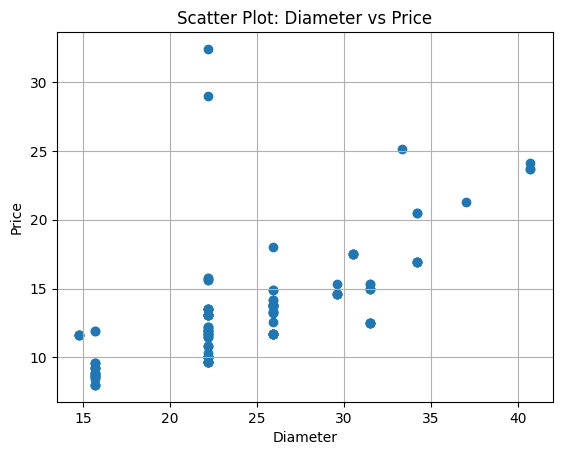

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(pizza_df['diameter'], pizza_df['price'])
plt.xlabel('Diameter')
plt.ylabel('Price')
plt.title('Scatter Plot: Diameter vs Price')
plt.grid(True)
plt.show()

## Ramen

load the “ramen_ratings.xlsx” into a pandas dataframe

In [ ]:
import pandas as pd

data = pd.read_excel("ramen_ratings.xlsx")
print(data)

      ReviewID           Brand  \
0         2580       New Touch   
1         2579        Just Way   
2         2578          Nissin   
3         2577         Wei Lih   
4         2576  Ching's Secret   
...        ...             ...   
2572         5           Vifon   
2573         4         Wai Wai   
2574         3         Wai Wai   
2575         2         Wai Wai   
2576         1        Westbrae   

                                                Variety Style   Country  Stars  
0                             T's Restaurant Tantanmen    Cup     Japan   3.75  
1     Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...  Pack    Taiwan   1.00  
2                         Cup Noodles Chicken Vegetable   Cup       USA   2.25  
3                         GGE Ramen Snack Tomato Flavor  Pack    Taiwan   2.75  
4                                       Singapore Curry  Pack     India   3.75  
...                                                 ...   ...       ...    ...  
2572  Hu Tiu Nam Vang ["

use groupby or pivot_table to show the average rating per country

In [ ]:
average_rating_per_country = data.groupby("Country")["Stars"].mean()
print("Average rating per country:")
print(average_rating_per_country)

Average rating per country:
Country
Australia        3.138636
Bangladesh       3.714286
Brazil           4.350000
Cambodia         4.200000
Canada           2.243902
China            3.421893
Colombia         3.291667
Dubai            3.583333
Estonia          3.500000
Fiji             3.875000
Finland          3.583333
Germany          3.638889
Ghana            3.500000
Holland          3.562500
Hong Kong        3.801825
Hungary          3.611111
India            3.395161
Indonesia        4.067460
Japan            3.981605
Malaysia         4.154194
Mexico           3.730000
Myanmar          3.946429
Nepal            3.553571
Netherlands      2.483333
Nigeria          1.500000
Pakistan         3.000000
Philippines      3.329787
Poland           3.625000
Sarawak          4.333333
Singapore        4.126147
South Korea      3.790554
Sweden           3.250000
Taiwan           3.665402
Thailand         3.384817
UK               2.997101
USA              3.457043
United States    3.750000
Vi

which are the 3 best countries to eat ramen?

In [ ]:
best_countries = average_rating_per_country.nlargest(3)
print("Top 3 best countries:", best_countries)

Top 3 best countries: Country
Brazil      4.350000
Sarawak     4.333333
Cambodia    4.200000
Name: Stars, dtype: float64


which are the 3 worst?

In [ ]:
worst_countries = average_rating_per_country.nsmallest(3)
print("Top 3 worst countries:", worst_countries)

Top 3 worst countries: Country
Nigeria        1.500000
Canada         2.243902
Netherlands    2.483333
Name: Stars, dtype: float64


Delete all columns except “Stars” and “Style”

In [ ]:
data = data[["Stars", "Style"]]
print(data)

      Stars Style
0      3.75   Cup
1      1.00  Pack
2      2.25   Cup
3      2.75  Pack
4      3.75  Pack
...     ...   ...
2572   3.50  Bowl
2573   1.00  Pack
2574   2.00  Pack
2575   2.00  Pack
2576   0.50  Pack

[2577 rows x 2 columns]


Groupby “Style” and count how many times each packaging style is in the


In [ ]:
packaging_style_count = data.groupby("Style").size()
print("Packaging style counts:")
print(packaging_style_count)

Packaging style counts:
Style
Bar        1
Bowl     481
Box        6
Can        1
Cup      450
Pack    1528
Tray     108
dtype: int64


Visualize it with a column chart - .plot.bar()

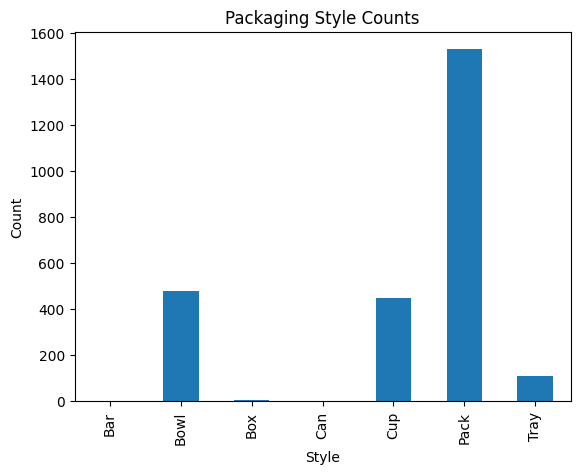

In [ ]:
import matplotlib.pyplot as plt
packaging_style_count.plot(kind="bar")
plt.title("Packaging Style Counts")
plt.xlabel("Style")
plt.ylabel("Count")
plt.show()